<a href="https://colab.research.google.com/github/asluchych/introduction-econometrics/blob/main/chapter5_statsmodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5: Multiple Regression Model                         
# Assignment 3 

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import t

Read data

In [5]:
houseprices = pd.read_csv("houseprices2.csv")

Exploration:

- data summary

In [6]:
houseprices.describe().round(2)

,AGE,BATHS,BEDROOMS,FIREPLACE,OWNER,POOL,PRICE,SQFT,TRADITIONAL,WATERFRONT
count,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00
mean,19.57,1.97,3.18,0.56,0.49,0.08,154863.18,2325.94,0.54,0.07
std,17.19,0.61,0.71,0.50,0.50,0.27,122912.81,1008.10,0.50,0.26
min,1.00,1.00,1.00,0.00,0.00,0.00,22000.00,662.00,0.00,0.00
25%,5.00,2.00,3.00,0.00,0.00,0.00,99000.00,1604.50,0.00,0.00
50%,18.00,2.00,3.00,1.00,0.00,0.00,130000.00,2186.50,1.00,0.00
75%,25.00,2.00,4.00,1.00,1.00,0.00,170162.50,2800.00,1.00,0.00
max,80.00,5.00,8.00,1.00,1.00,1.00,1580000.00,7897.00,1.00,1.00


- covariance matrix

In [7]:
houseprices[['PRICE', 'SQFT', 'AGE']].cov()

,PRICE,SQFT,AGE
PRICE,1.510756e+10,9.425559e+07,-440872.843047
SQFT,9.425559e+07,1.016262e+06,-2392.559349
AGE,-4.408728e+05,-2.392559e+03,295.642330


- scatterplot price vs. sqft

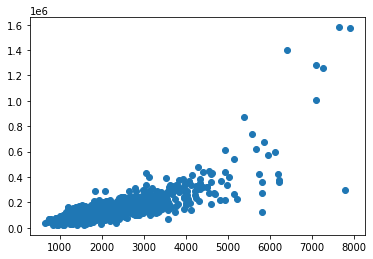

In [8]:
plt.scatter(houseprices['SQFT'], houseprices['PRICE'])

- scatterplot price vs. age


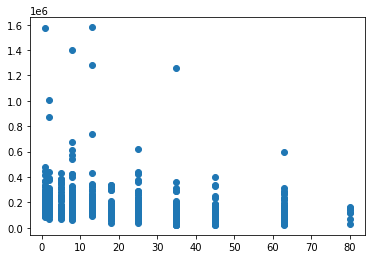

In [9]:
plt.scatter(houseprices['AGE'], houseprices['PRICE'])

Model 1

In [ ]:
y = houseprices['PRICE']
X1 = houseprices[['SQFT', 'AGE']]
X1 = sm.add_constant(X1)

In [11]:
model1 = sm.OLS(y, X1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     773.6
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          5.21e-209
Time:                        18:37:00   Log-Likelihood:                -13708.
No. Observations:                1080   AIC:                         2.742e+04
Df Residuals:                    1077   BIC:                         2.744e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.195e+04   6989.636     -6.001      0.000   -5.57e+04   -2.82e+04
SQFT          90.9698      2.403     37.855      0.000      86.255      95.685
AGE         -755.0414    140.894     -5.359      0.000   -1031.498    -478.584
==============================================================================
Omnibus:                     1233.525   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           157469.949
Skew:                           5.492   Prob(JB):                         0.00
Kurtosis:                      61.127   Cond. No.                     7.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% Confidence Interval

In [12]:
model1.conf_int(alpha=0.05).loc['SQFT']

0    86.254511
1    95.685087
Name: SQFT, dtype: float64

t-Test: H_0: beta_3 >=-1000

In [13]:
hypotheses = 'AGE = -1000'
t_test = model1.t_test(hypotheses)
print(t_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0          -755.0414    140.894      1.739      0.082   -1031.498    -478.584


Calculate p-value

In [14]:
df = houseprices.shape[0] - model1.params.shape[0]

Critical value

In [29]:
-t.ppf(0.95, df)

-1.6462696795616023

p-value

In [15]:
t.cdf(1.739, df)

0.9588397526043893

Model 2: include squared terms

In [16]:
houseprices['SQFT2'] = houseprices['SQFT'] ** 2
houseprices['AGE2'] = houseprices['AGE'] ** 2

In [ ]:
X2 = houseprices[['SQFT', 'SQFT2', 'AGE', 'AGE2']]
X2 = sm.add_constant(X2)

In [18]:
model2 = sm.OLS(y, X2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     746.0
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          2.82e-308
Time:                        18:37:00   Log-Likelihood:                -13471.
No. Observations:                1080   AIC:                         2.695e+04
Df Residuals:                    1075   BIC:                         2.698e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.701e+05   1.04e+04     16.310      0.000     1.5e+05    1.91e+05
SQFT         -55.7842      6.389     -8.731      0.000     -68.321     -43.247
SQFT2          0.0232      0.001     24.013      0.000       0.021       0.025
AGE        -2797.7885    305.116     -9.170      0.000   -3396.478   -2199.099
AGE2          30.1603      5.071      5.948      0.000      20.210      40.111
==============================================================================
Omnibus:                      385.274   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            97267.990
Skew:                          -0.248   Prob(JB):                         0.00
Kurtosis:                      49.489   Cond. No.                     4.99e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.99e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Marginal Effects

In [19]:
effectSqftMin = model2.params['SQFT'] + 2*model2.params['SQFT2']*min(houseprices['SQFT'])
effectSqftMax = model2.params['SQFT'] + 2*model2.params['SQFT2']*max(houseprices['SQFT'])
effectSqft2000 = model2.params['SQFT'] + 2*model2.params['SQFT2']*2000
print(effectSqftMin)
print(effectSqft2000)
print(effectSqftMax)

-25.129835762170213
36.82710183714359
309.89142248225085


In [53]:
effectAgeMin = model2.params['AGE'] + 2*model2.params['AGE2']*min(houseprices['AGE'])
effectAgeMax = model2.params['AGE'] + 2*model2.params['AGE2']*max(houseprices['AGE'])
effectAge25 = model2.params['AGE'] + 2*model2.params['AGE2']*25
print(effectAgeMin)
print(effectAge25)
print(effectAgeMax)

-2737.4678244684637
-1289.771885634424
2027.8646408602508


95% Confidence Interval for a house with 2000 sqft

In [41]:
# calculate standarderror of the linear combination of coefficients
seSqft2000 = np.sqrt(model2.cov_params()['SQFT']['SQFT'] + (2*2000)**2*model2.cov_params()['SQFT2']['SQFT2'] + 2*2*2000*model2.cov_params()['SQFT']['SQFT2'])

2.9556624345951286

In [51]:
# calculate upper and lower bound
upperB = effectSqft2000 + t.ppf(0.975, model2.df_resid)*seSqft2000
lowerB = effectSqft2000 - t.ppf(0.975, model2.df_resid)*seSqft2000
lowerB, upperB

(31.027580240619386, 42.62662343366779)

t-Test H_0: effect >=-1000 at age=25

In [61]:
# calculate standard error of the linear combination of coefficients
seAge25 = np.sqrt(model2.cov_params()['AGE']['AGE'] + (2*25)**2*model2.cov_params()['AGE2']['AGE2'] + 2*2*25*model2.cov_params()['AGE']['AGE2'])
# calculate t-Statistic: H_0: beta_4 + 2*beta_5*25 >= -1000
tstat20 = (effectAge25 - (-1000))/seAge25
tstat20

-2.455325739463889

In [62]:
# calculate the p-value, left-sided
t.cdf(tstat20, df)

0.007116444082766405